# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
import praw
import pandas as pd
import credentials
import matplotlib.pyplot as plt
import seaborn as sns

#### Creating subreddit account

In [2]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

#### Collecting data from Subreddit

In [3]:
co_subreddit = reddit.subreddit('snowfall').hot(limit=10)

In [4]:
for post in co_subreddit:
    print(post.title, post.num_comments)

Snowfall S06xE10 | Sins of the Father | Episode Discussion 4896
I couldn’t stand Louie 18
Skyzoo brilliant Snowfall based album is now Deluxe!! Peep cover is changed to the now Alcoholic homeless Franklin 2
Franklin Saint’s downfall wasn’t his fault. 78
Holy fuck 39
What exactly would have happened if Franklin had someone anonymously call the cops.. 7
Franklin is lord shiva 7
Don’t let Teddy see this 33
Why was season 1 so sorry and mid? It’s hard to put this show onto a friend 29
Franklin offscreen on the plane back to LA, in his head, after he left his cane in Mel classroom at the end of S4 2


In [5]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [], 
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('snowfall').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [6]:
co_df = pd.DataFrame(reddit_data)

In [7]:
co_df

,title,link,author,n_comments,score,text
0,Snowfall S06xE10 | Sins of the Father | Episod...,/r/SnowFall/comments/12sdjgm/snowfall_s06xe10_...,md28usmc,4896,487,The discussion/comments below assume you have ...
1,I couldn’t stand Louie,/r/SnowFall/comments/1b77jr4/i_couldnt_stand_l...,2wavyyGuyy,18,24,I just finished Snowfall and man I was heated ...
2,Skyzoo brilliant Snowfall based album is now D...,/r/SnowFall/comments/1b77nny/skyzoo_brilliant_...,smashadamspel,2,9,
3,Franklin Saint’s downfall wasn’t his fault.,/r/SnowFall/comments/1b6u47l/franklin_saints_d...,Xaixiu,78,24,Franklin would’ve been a top player and CEO fo...
4,Holy fuck,/r/SnowFall/comments/1b6e7uu/holy_fuck/,Expert_Dog_9069,39,132,"just finished the show, yes i’m a bit late \n\..."
...,...,...,...,...,...,...
994,Saw it on TikTok,/r/SnowFall/comments/15w407t/saw_it_on_tiktok/,compromisedpilot,8,15,the cinematography is insane for some no brand...
995,"Learn the best methods for CPNs, EDD, and more...",/r/SnowFall/comments/15vukvt/learn_the_best_me...,OrdinaryOutrageous40,0,20,
996,¿Que opinás de la mañana de la gran nevada en ...,/r/SnowFall/comments/15vwbh2/que_opinás_de_la_...,ushuaiafindelmundo,1,3,
997,I asked Michael Hyatt who plays Cissy Saint if...,/r/SnowFall/comments/15utayc/i_asked_michael_h...,tfengbrah,14,55,Kill Teddy regardless of what he said and she ...


#### Saving data to SQLLite3

In [8]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

999

In [9]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,Snowfall S06xE10 | Sins of the Father | Episod...,/r/SnowFall/comments/12sdjgm/snowfall_s06xe10_...,md28usmc,4896,487,The discussion/comments below assume you have ...
1,I couldn’t stand Louie,/r/SnowFall/comments/1b77jr4/i_couldnt_stand_l...,2wavyyGuyy,18,24,I just finished Snowfall and man I was heated ...
2,Skyzoo brilliant Snowfall based album is now D...,/r/SnowFall/comments/1b77nny/skyzoo_brilliant_...,smashadamspel,2,9,
3,Franklin Saint’s downfall wasn’t his fault.,/r/SnowFall/comments/1b6u47l/franklin_saints_d...,Xaixiu,78,24,Franklin would’ve been a top player and CEO fo...
4,Holy fuck,/r/SnowFall/comments/1b6e7uu/holy_fuck/,Expert_Dog_9069,39,132,"just finished the show, yes i’m a bit late \n\..."
...,...,...,...,...,...,...
994,Saw it on TikTok,/r/SnowFall/comments/15w407t/saw_it_on_tiktok/,compromisedpilot,8,15,the cinematography is insane for some no brand...
995,"Learn the best methods for CPNs, EDD, and more...",/r/SnowFall/comments/15vukvt/learn_the_best_me...,OrdinaryOutrageous40,0,20,
996,¿Que opinás de la mañana de la gran nevada en ...,/r/SnowFall/comments/15vwbh2/que_opinás_de_la_...,ushuaiafindelmundo,1,3,
997,I asked Michael Hyatt who plays Cissy Saint if...,/r/SnowFall/comments/15utayc/i_asked_michael_h...,tfengbrah,14,55,Kill Teddy regardless of what he said and she ...


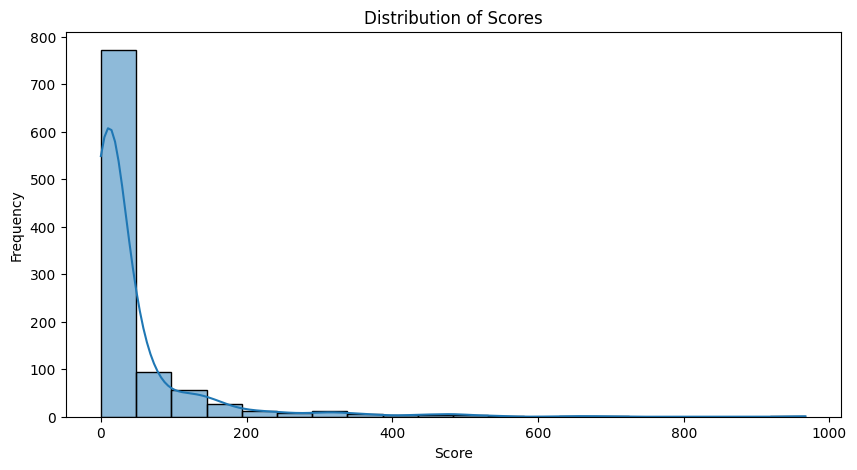

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=co_df, x='score', bins=20, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

The histogram tells us about the popularity of Reddit posts. Each bar shows how many posts have a certain level of popularity, or "score." This helps us see if most posts are very popular, not so popular, or somewhere in between.

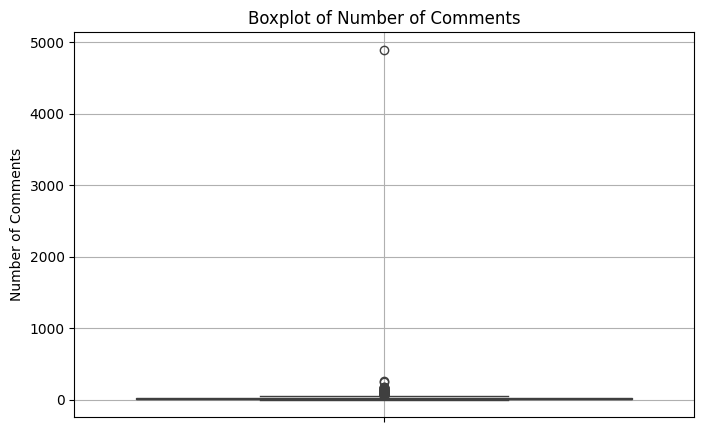

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=co_df, y='n_comments')
plt.title('Boxplot of Number of Comments')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

The boxplot provides a summary of the distribution of the number of comments on the posts. It helps identify the median, quartiles, and outliers in the comment counts. This visualization aids in understanding the spread and variability in the number of comments across the posts.

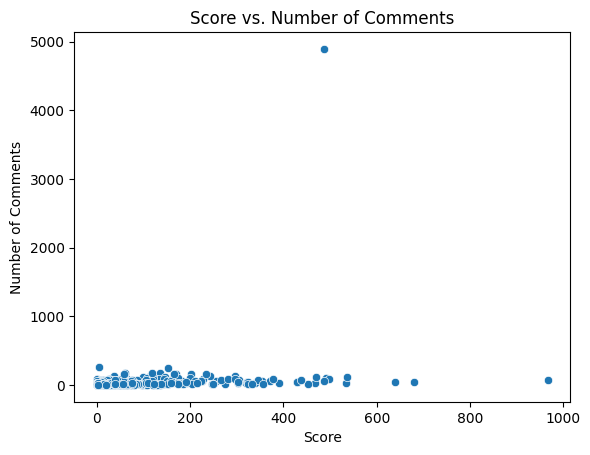

In [12]:
sns.scatterplot(data=co_df, x='score', y='n_comments')
plt.title('Score vs. Number of Comments')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.show()

This scatter plot visualizes the relationship between the score (popularity) of a post and the number of comments it has received. It helps in analyzing if there's any correlation between a post's score and the level of discussion it generates (number of comments). 

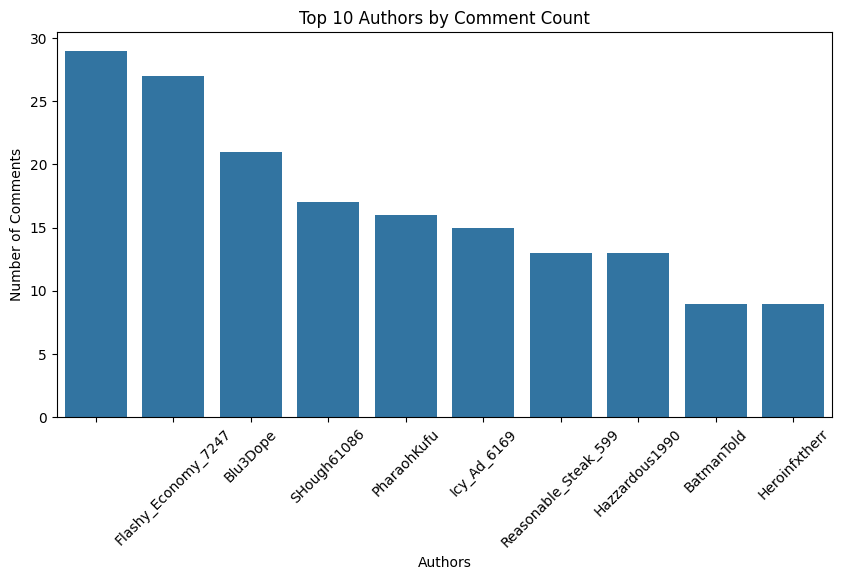

In [13]:
top_authors = co_df['author'].value_counts()[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 10 Authors by Comment Count')
plt.xlabel('Authors')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

This bar chart displays the top 10 authors ranked by the total number of comments they have contributed across all posts. It provides insights into which authors are most active in the subreddit, contributing to discussions and interactions. 

In [14]:
co_df[co_df['author'] == '']

,title,link,author,n_comments,score,text
355,S1 Onwards Question...,/r/SnowFall/comments/190v8g0/s1_onwards_question/,,8,7,"Just finished Season 1, loved it apart from th..."
642,How y’all think the story would have gone if F...,/r/SnowFall/comments/17jmfp5/how_yall_think_th...,,11,4,
678,Idc what noone says. Season 4 was PEAK snowfall.,/r/SnowFall/comments/17crfcy/idc_what_noone_sa...,,30,45,I never understood why people act like It's th...
688,Which one of these Characters were written/kil...,/r/SnowFall/comments/17bzms0/which_one_of_thes...,,10,2,I think Ima go with Ray Ray on this one. Bring...
696,The Kane storyline is so stupid,/r/SnowFall/comments/17aburk/the_kane_storylin...,,35,32,When I saw those shots being fired at Franklin...
698,What’s y’all’s fave songs from the series?,/r/SnowFall/comments/17ah39b/whats_yalls_fave_...,,19,13,Mine is Notorious
701,Crip vs Crip Showdown PT 1. Who Wins?,/r/SnowFall/comments/17aoedi/crip_vs_crip_show...,,3,2,ManBoy (Compton) vs Big Deon (PJ Watts)
706,Which One Of These Characters Should've Had Mo...,/r/SnowFall/comments/17aa2mx/which_one_of_thes...,,3,2,\n\n[View Poll](https://www.reddit.com/poll/17...
707,I think Wanda’s character was irrelevant and l...,/r/SnowFall/comments/17a6o96/i_think_wandas_ch...,,26,4,She didn’t really add much to the storyline tb...
709,"Idky, but I couldn’t take Peaches and Manboy s...",/r/SnowFall/comments/179er1v/idky_but_i_couldn...,,11,12,It felt so weird watching them on there. Like ...


### Summary:

This Python code uses a library called PRAW to gather information from the "snowfall" subreddit on Reddit. It collects various details about the posts there, like their titles, links, authors, how many comments they have, their scores, and what they say. This data is then organized into a table using pandas, a tool for handling data in Python, and saved in a way that makes it easy to analyze later on.

After saving the data, the code creates some pictures, or visualizations, to help us understand what's happening in the subreddit. One picture is like a bar graph that shows how many posts have different scores. Another picture looks like a box and whisker plot, which tells us how many comments each post has and helps us spot any unusual numbers. There's also a scatter plot, which shows if there's a connection between a post's score and how many comments it gets. Finally, there's a bar chart that highlights the top 10 people who have left the most comments in the subreddit.

These pictures are helpful because they give us clues about how active and popular the subreddit is. We can see which posts are getting lots of attention and who's contributing the most to discussions. By saving the data in a special place, like a database, it's easier to ask questions about the posts in the future.

In short, this code helps us peek into what's going on in the "snowfall" subreddit. It uses pictures to show us how many people are talking about different posts and who's leading the conversation. And by saving all this information, we can dig deeper into the subreddit's activity whenever we want.